# Восстановление золота из руды

Компания «Цифры» разрабатывает решения для эффективной работы промышленных предприятий. Нужно подготовить прототип модели машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные:
- изучить данные
- проверить расчет эффективности обогащения (вычислить эффективность обогащения на обучающей выборке для признака rougher.output.recovery)
- найти MAE между своими расчётами и значением признака
- проанализировать признаки, недоступные в тестовой выборке
- провести предобработку данных
2. Провести исследовательский анализ данных:
- изучить, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки
- сравнить распределения размеров гранул сырья на обучающей и тестовой выборках
- исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах
3. Построить и обучить модель:
- написать функцию для вычисления итоговой sMAPE
- обучить разные модели, оценить их качество кросс-валидацией
- выбрать лучшую модель
- проверить её на тестовой выборке и с помощью константной модели

В распоряжении есть данные с параметрами добычи и очистки:
- обучающая выборка 
- тестовая выборка
- исходные данные, содержащие обучающую и тестовую выборки со всеми признаками

Технологический процесс:
- Rougher feed — исходное сырье
- Rougher additions — флотационные реагенты: Xanthate, Sulphate, Depressant
- Rougher process — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов:
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

Возможные этапы:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения типов параметров:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Расчет-эффективности-обогащения-чернового-концентрата" data-toc-modified-id="Расчет-эффективности-обогащения-чернового-концентрата-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчет эффективности обогащения чернового концентрата</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-разных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-на-разных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на разных этапах очистки</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья" data-toc-modified-id="Распределение-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-веществ-на-всех-стадиях" data-toc-modified-id="Суммарная-концентрация-веществ-на-всех-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ на всех стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-к-обучению-моделей" data-toc-modified-id="Подготовка-данных-к-обучению-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных к обучению моделей</a></span></li><li><span><a href="#Функция-для-вычисления-итогового-sMAPE" data-toc-modified-id="Функция-для-вычисления-итогового-sMAPE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция для вычисления итогового sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Подготовка данных

### Загрузка и изучение данных

Подключим все необходимые библиотеки/функции и загрузим файлы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# для расчета MAE и создания своего scorer
from sklearn.metrics import mean_absolute_error, make_scorer
# для кросс-валидации
from sklearn.model_selection import cross_val_score, GridSearchCV
# для масштабирования
from sklearn.preprocessing import StandardScaler
# для перемешивания выборок
from sklearn.utils import shuffle
# для создания pipeline
from sklearn.pipeline import make_pipeline

# убрать предупреждение SettingWithCopy от библиотек pandas и sklearn
pd.options.mode.chained_assignment = None

# Дерево решений
from sklearn.tree import DecisionTreeRegressor
# Случайный лес
from sklearn.ensemble import RandomForestRegressor
# Линейная регрессия
from sklearn.linear_model import LinearRegression
# для dummy-модели
from sklearn.dummy import DummyRegressor

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
# посмотрим размеры выборок
print('Размер обучающей выборки:', data_train.shape)
print('Размер тестовой выборки:', data_test.shape)
print('Размер полных данных:', data_full.shape)

Размер обучающей выборки: (14149, 87)
Размер тестовой выборки: (5290, 53)
Размер полных данных: (19439, 87)


В тестовой выборке отсутствуют некоторые признаки (столбцы), которые есть в обучающей, так как некоторые параметры замеряются и/или рассчитываются значительно позже. Количество строк в тестовой и обучающей выборках в сумме соответствуют количеству строк в полной выборке.

In [4]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Выведем общую информацию по всем датасетам.

In [7]:
# обучающая выборка
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
# тестовая выборка
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [9]:
# полная выборка
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Везде есть пропуски - выведем наглядно. Позднее обработаем пропуски (часть удалим, часть заполним).

In [10]:
# функция выводит графически пропуски в столбцах
def pass_value_barh(df, title, head_firsize, tail_figsize):
    (
        (df.isna().mean())
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(head_firsize, tail_figsize), legend = False)
        .set_title(f'Пропущенные значения {title}' + "\n", fontsize = 22, color = 'SteelBlue')    
    );


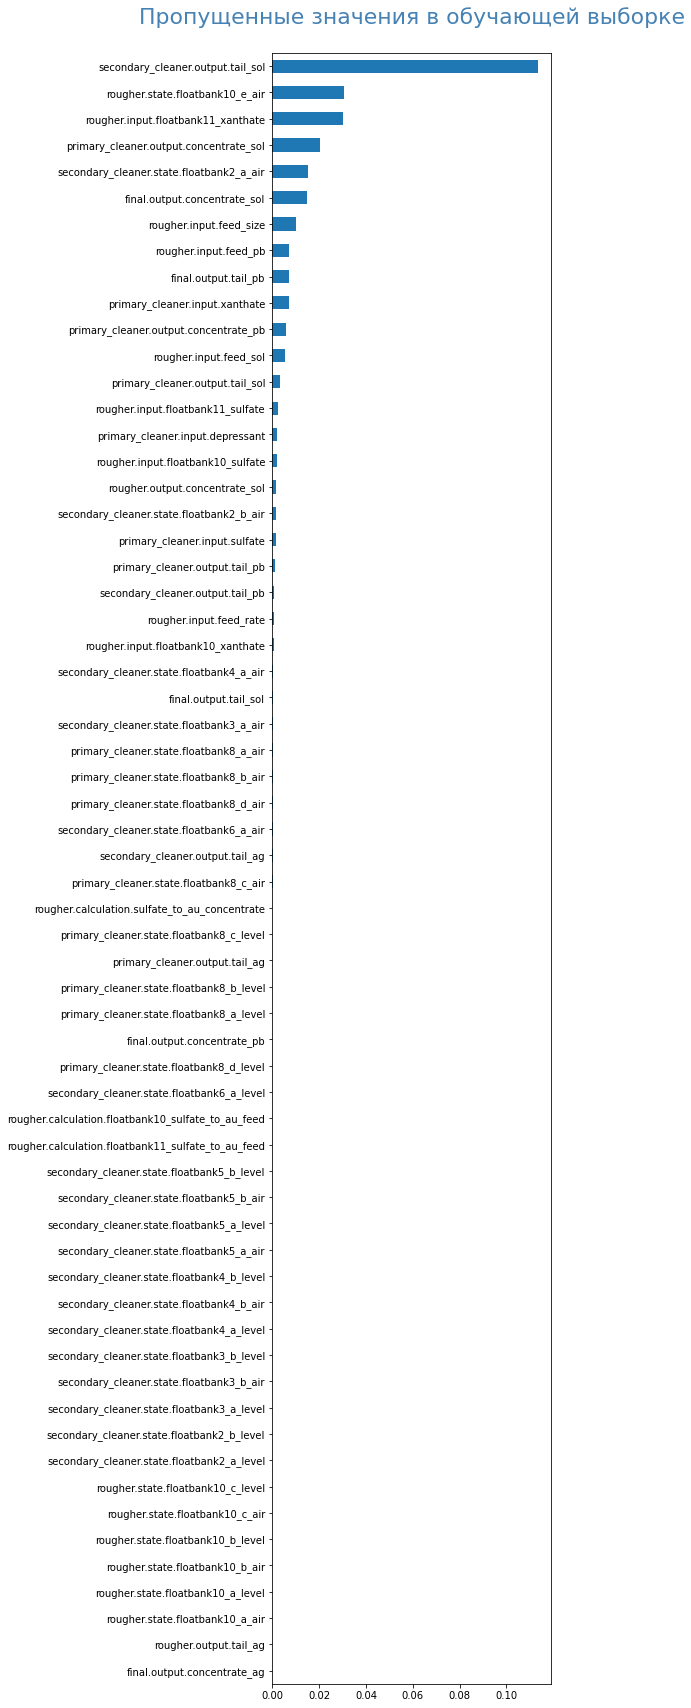

In [11]:
pass_value_barh(data_train, 'в обучающей выборке', 5, 30)

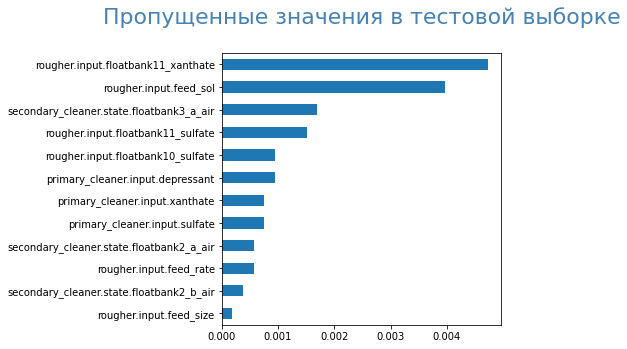

In [12]:
pass_value_barh(data_test, 'в тестовой выборке', 5, 5)

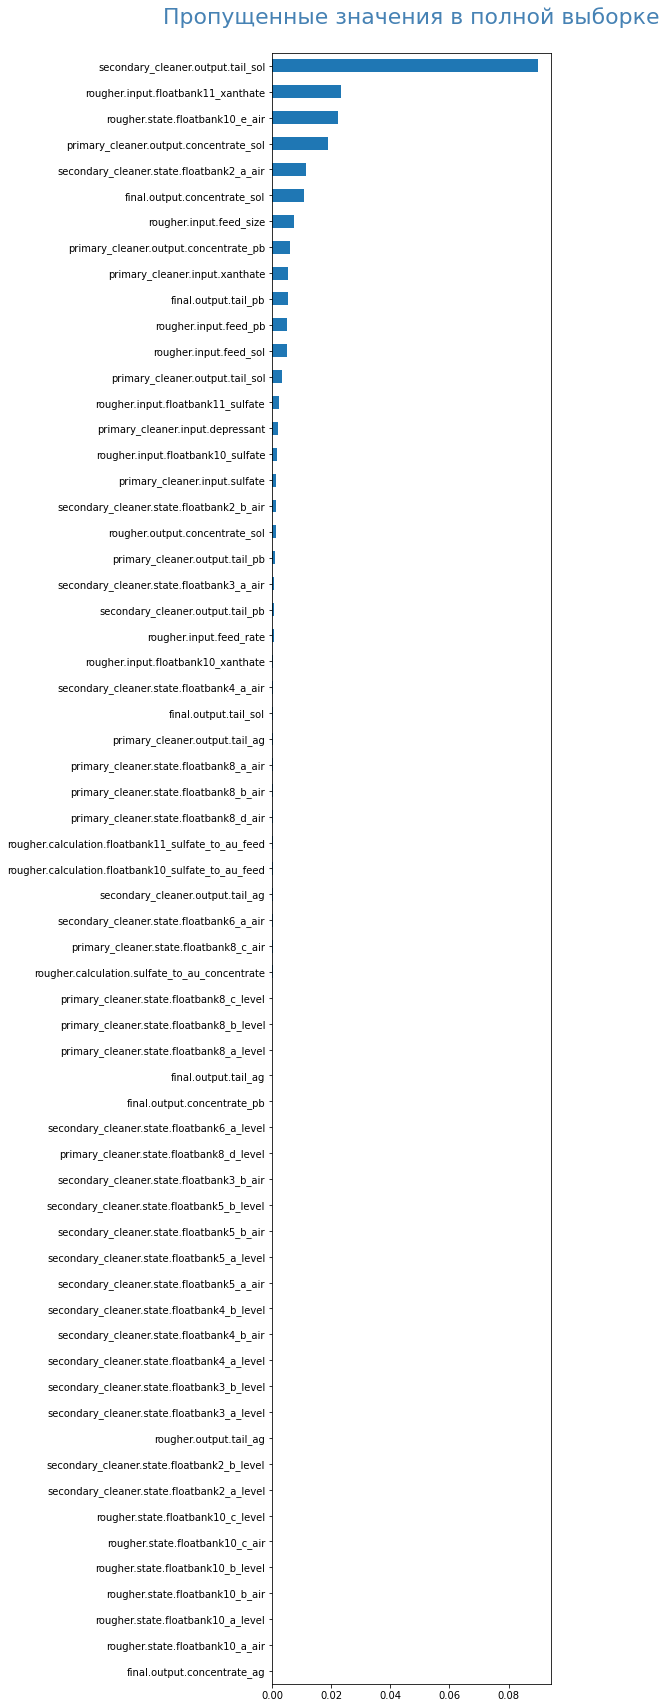

In [13]:
pass_value_barh(data_full, 'в полной выборке', 5, 30)

<b>Выводы:</b>
1. Во всех датасетах столбцы с датой и временем в формате object, нужен тип datetime. 
2. Остальные данные - числа с плавающей точкой.
3. В обучающей и в полной выборках в столбцах "rougher.output.recovery" и "final.output.recovery" нет пропусков.
4. Во всех выборках есть пропуски данных.
5. В тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей выборке.

### Расчет эффективности обогащения чернового концентрата

Эффективность обогащения рассчитывается по формуле:

![Эффективность обогащения](https://i.ibb.co/CWXQCts/recovery.png)

где:
- C — доля золота в концентрате после флотации/очистки
- F — доля золота в сырье/концентрате до флотации/очистки
- T — доля золота в отвальных хвостах после флотации/очистки

In [14]:
# присвоим соответствующие столбцы переменным
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [15]:
# посчитаем recovery на обучающей выборке
recovery = ((C * (F - T)) / (F * (C - T))) * 100
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [16]:
# выведем среднее и медианное значения, среднеквадратичное отклонение
recovery.describe()

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64

Расчитаем MAE между полученными recovery и значением признака rougher.output.recovery.

In [17]:
mae = mean_absolute_error(data_train['rougher.output.recovery'], recovery)
print('MAE =', mae)

MAE = 9.73512347450521e-15


MAE (средняя абсолютная ошибка) между рассчитаной по формуле эффективностью обогащения чернового концентрата и признаком "rougher.output.recovery" из обучающей выборки небольшая, значит значение эффективности в датасете верное.

### Признаки, недоступные в тестовой выборке

Найдем все признаки в обучающей выборке, которых нет в тестовой.

In [18]:
features_no_test = set(data_train.columns.to_list()) - set(data_test.columns.to_list())
features_no_test

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют признаки этапов final.output, primary_cleaner.output, rougher.output, secondary_cleaner.output. Это целевые признаки, их получают по окончании этапов технологических процессов - это онлайн метрики. 

Признаки rougher.calculation - это расчетные характеристики, они также рассчитываются после завершения этапа технологического процесса.

### Предобработка данных

Сначала поменяем тип данных в столбцах object на datetime во всех выборках.

In [19]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')

Теперь нужно заполнить пропуски в обучающей и тестовой выборках. По условию проекта соседние по времени параметры часто похожи, поэтому заполним пропуски соседними значениями (метод ffill).

In [20]:
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')
data_full = data_full.fillna(method='ffill')

In [21]:
print('В обучающей выборке есть пропуски:', data_train.isna().values.any())
print('В тестовой выборке есть пропуски:', data_test.isna().values.any())
print('В полной выборке есть пропуски:', data_full.isna().values.any())

В обучающей выборке есть пропуски: False
В тестовой выборке есть пропуски: False
В полной выборке есть пропуски: False


Добавим в тестовую выборку целевые столбцы 'rougher.output.recovery' и 'final.output.recovery' из полной исходной выборки, чтобы в дальнейшем проверить итоговое качество модели.

In [22]:
# размер изначальной тестовой выборки
data_test.shape

(5290, 53)

In [23]:
# добавим 2 столбца по ключу 'date'
data_test = data_test.merge(data_full.loc[:,['date', 'rougher.output.recovery', \
                                        'final.output.recovery']], how='left', on='date')

In [24]:
# размер новой тестовой выборки
data_test.shape

(5290, 55)

### Выводы

После загрузки и изучения данных обнаружено и сделано:
- в изначальной тестовой выборке не хватало многих признаков, которые получают/измеряют в конце этапов технологического процесса
- посчитали recovery и MAE между нашими расчетами - эффективность обогащения чернового концентрата золота рассчитана верно
- в выборках было много пропусков - заполнили их ближайшими значениями
- добавили в тестовую выборку целевые признаки
- данные готовы к дальнейшему анализу

## Анализ данных

### Концентрация металлов на разных этапах очистки

Посмотрим, как меняется концентрация металлов (Au - золото, Ag - серебро, Pb - свинец) на различных этапах очистки.

In [25]:
metals = ['au', 'ag', 'pb']
process = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']

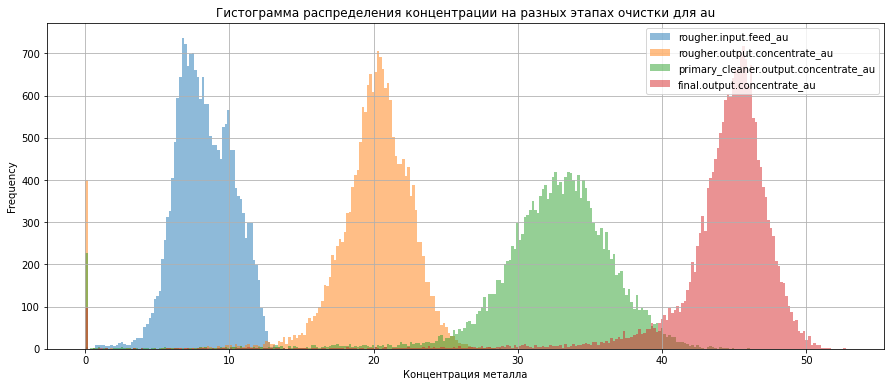

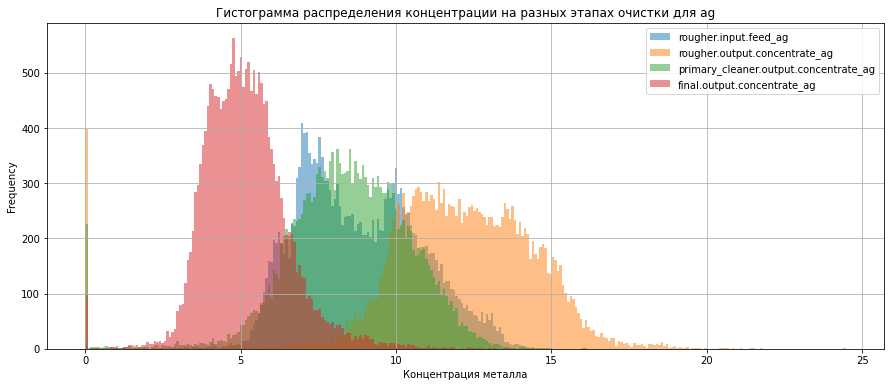

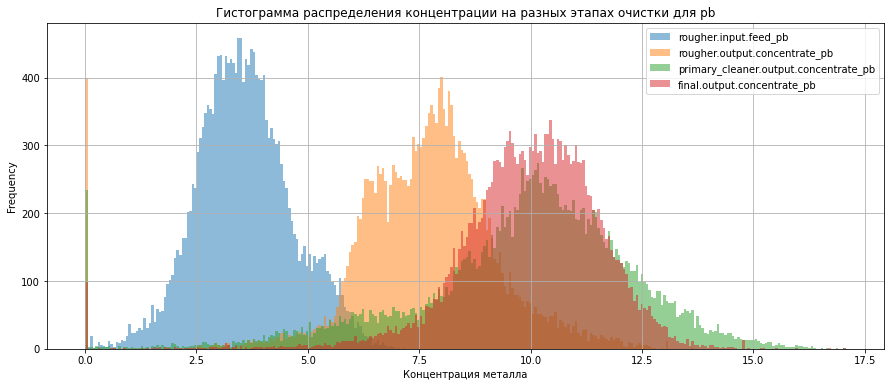

In [26]:
for metal in metals:
    process_met = ['{}_{}'.format(proc, metal) for proc in process]
    data_full[process_met].plot(
            kind='hist', 
            figsize=(15, 6), 
            bins=300, 
            grid=True,
            legend=True, 
            alpha=0.5, 
            title = 'Гистограмма распределения концентрации на разных этапах очистки для ' + metal
        ).set(xlabel='Концентрация металла')
    plt.show()

Сформируем из полученных данных DataFrame и найдем средние значения концентрации всех металлов на каждом этапе. Выведем данные графически.

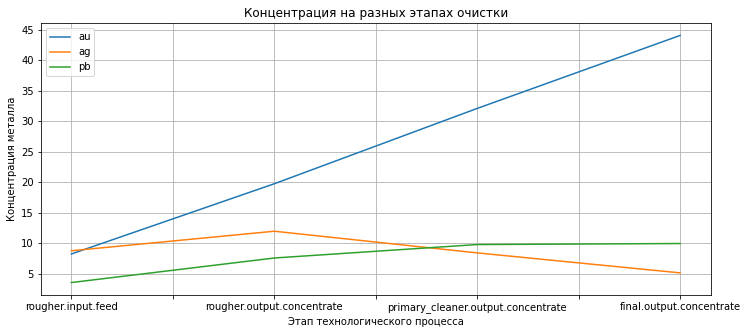

In [27]:
mean_concentrate = pd.DataFrame(columns=process)
for metal in metals:
    for proc in process:
        mean_concentrate.loc[metal, proc] = data_full['{}_{}'.format(proc, metal)].mean()
    mean_concentrate.loc[metal].plot(
        title='Концентрация на разных этапах очистки', 
        grid=True, 
        legend=True, 
        figsize=(12, 5)
    ).set(xlabel='Этап технологического процесса', ylabel = 'Концентрация металла')
plt.show() 

На графиках видим:
1. Концентрация золота повышается с каждым этапом. Цель флотации и первичной и вторичной очисток  - увеличить концентрацию золота. На финальном этапе концентрация золота увеличивается почти в 4,5 раза относительно первоначальной смеси руды.
2. Концентрация серебра понижается после флотации и равномерно уменьшается с каждым следующим этапом очистки.
3. Концентрация свинца повышается с этапа флотации до первой очистки, затем стабилизируется и не меняется. Скорее всего это связано с технологическим процессом очистки золота.
4. Есть много нулевых значений для всех металлов.

### Распределение размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках перед флотацией и перед первичной очисткой.

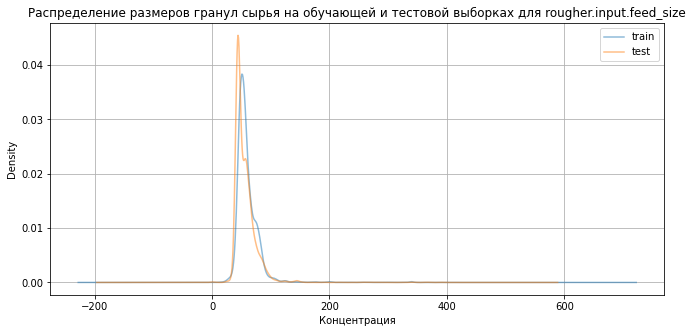

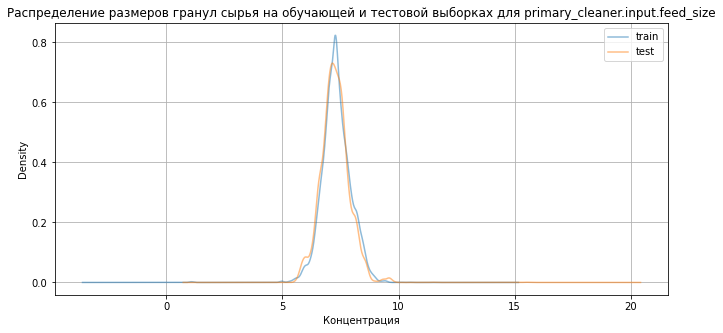

In [28]:
for proc in ('rougher.input.feed_size', 'primary_cleaner.input.feed_size'):
    for title, df in (('train', data_train), ('test', data_test)):
        df[proc].plot.kde(    
            title = 'Распределение размеров гранул сырья на обучающей и тестовой выборках для ' + proc,
            grid=True, 
            legend=True,
            figsize=(11, 5),
            alpha=0.5,
            label=title,
            ).set(xlabel='Концентрация')
  
    plt.show()

Распределение размеров гранул до флотации и перед первичной очисткой - нормальное с длинными хвостами на обеих выборках.

Распределения размеров гранул сырья на обучающей и тестовой выборках совпадают, значит оценка обученной модели будет правильной.

### Суммарная концентрация веществ на всех стадиях

Посчитаем сумму концентраций всех металлов и солей на каждом этапе технологического процесса, запишем их в датасет для дальнейшего поиска аномалий. 

Аномалии в тестовой выборке удалять нет смысла, так как они не ухудшат качество обучения модели.

In [29]:
for proc in process:
    data_train[proc] = 0
    for metal in metals + ['sol']:
#        print(metal)
        data_train[proc] += data_train['{}_{}'.format(proc, metal)]
    
data_train[process].head(5)

,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
3,51.061546,65.752751,59.957723,63.573449
4,47.859163,65.908382,71.321010,64.004667


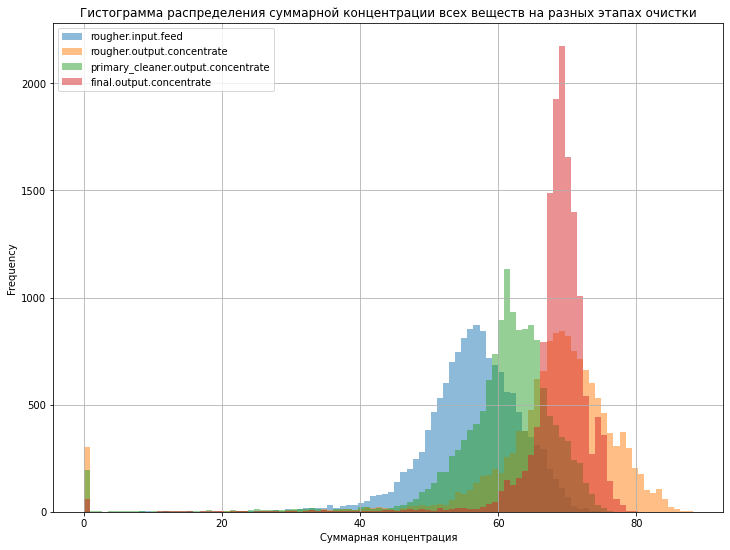

In [30]:
data_train[process].plot(
            kind='hist',    
            title = 'Гистограмма распределения суммарной концентрации всех веществ на разных этапах очистки',
            bins=100, 
            grid=True, 
            legend=True,
            figsize=(12, 9),
            alpha=0.5,
            ).set(xlabel='Суммарная концентрация')
plt.show()

На графике видим аномальные нулевые значения для трех этапов (кроме концентрации в исходном сырье). Скорее всего они связаны со сбоями измерительного оборудования, эти данные нам не помогут обучить модель, считаем их выбросами, удалим их.

In [31]:
# нулевые значения после флотации - 297 строк
data_train[data_train['rougher.output.concentrate'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228,58.602038,0.0,74.992510,66.175996
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683,59.921613,0.0,75.187102,66.794250
47,2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,...,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665,57.269041,0.0,75.513787,67.572604
48,2016-01-17 00:00:00,5.296830,10.597469,5.688961,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,...,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603,25.352358,0.0,75.491415,65.598903
49,2016-01-17 02:00:00,8.162896,8.877528,5.688961,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,...,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929,40.721375,0.0,71.837866,63.445359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,2018-02-11 23:59:59,4.909904,9.941006,8.191698,47.660737,83.597741,8.853800,0.717677,13.399798,1.515512,...,10.998883,-499.846204,8.972741,-500.118532,10.966205,-500.707126,58.106496,0.0,68.284696,70.703344
10331,2018-02-12 00:59:59,4.797572,9.889303,8.326773,47.801056,84.738648,8.503813,0.757507,13.591903,1.573222,...,11.010768,-494.562898,9.028307,-499.007596,10.978016,-497.924873,59.500740,0.0,68.539751,70.814703
10332,2018-02-12 01:59:59,4.329492,9.413122,8.173988,49.412576,73.519948,8.846540,1.479231,13.094763,2.760905,...,11.034954,-493.250025,9.029441,-480.953533,11.021042,-499.685577,60.129638,0.0,69.365785,71.329178
10333,2018-02-12 02:59:59,4.317169,9.642271,8.396492,48.839994,78.415342,8.485093,1.155559,13.380461,2.198065,...,10.972473,-511.806312,8.991251,-500.706169,10.990072,-499.775802,59.267147,0.0,69.325494,71.195925


In [32]:
# нулевые значения после первичной очистки - 74 строки
data_train[data_train['primary_cleaner.output.concentrate'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
19,2016-01-15 19:00:00,5.658943,10.436002,5.942418,42.509402,70.348300,10.232392,1.174845,19.498566,2.272460,...,10.032043,-499.128183,8.016140,-499.806844,13.949790,-600.140776,56.005644,62.930764,0.0,64.546766
22,2016-01-15 22:00:00,6.118749,10.483007,6.546983,41.406172,69.823900,10.322077,1.270956,19.384247,2.245145,...,9.985232,-499.796583,7.985524,-499.872153,13.973257,-600.054998,56.038252,62.225893,0.0,64.554911
30,2016-01-16 06:00:00,5.322681,9.577672,4.805490,44.059908,69.193840,10.334312,1.406355,19.923319,2.239310,...,9.969535,-499.350934,8.017975,-500.620850,11.999969,-600.315548,57.764677,62.283147,0.0,63.765751
71,2016-01-18 01:00:00,4.677499,11.304745,4.655438,45.135616,72.437752,10.525415,1.479372,19.364956,2.215637,...,10.025142,-499.554142,8.130711,-499.758800,11.951659,-600.726946,56.626743,61.183102,0.0,65.773298
74,2016-01-18 04:00:00,4.821388,10.235502,1.581066,43.264258,84.687443,5.520487,0.821232,9.264695,1.263480,...,10.012719,-501.020322,8.020406,-500.395112,11.995851,-598.774893,56.369424,60.301210,0.0,59.902215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10050,2018-01-30 18:59:59,6.171409,10.028069,8.180719,44.838592,69.768950,12.698090,3.846799,11.787711,4.596781,...,11.005325,-501.585062,9.019372,-500.133880,10.990548,-501.310121,69.972632,75.419077,0.0,69.218790
10053,2018-01-30 21:59:59,5.448963,9.682072,7.106848,46.458319,69.202697,12.375335,3.792151,10.337777,4.540384,...,10.912705,-499.595235,9.039400,-499.913941,11.020934,-499.812405,68.110175,74.071370,0.0,68.696202
10066,2018-01-31 12:59:59,6.137303,10.105221,8.836956,45.294555,72.130539,14.596224,3.702168,9.760608,4.180376,...,10.904775,-500.286259,9.051444,-500.015612,11.001724,-500.484293,66.538045,68.047932,0.0,70.374035
10126,2018-02-03 01:59:59,6.908167,10.288687,10.131302,43.902258,69.853454,13.838360,3.800475,11.336795,4.606074,...,10.983792,-499.813128,8.977426,-500.019081,10.981565,-501.764257,68.956264,80.582086,0.0,71.230414


In [33]:
# нулевые значения финального концентрата - 58 строк
data_train[data_train['final.output.concentrate'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
644,2016-02-13 11:00:00,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052,...,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808,46.703740,56.574778,53.725613,0.0
1193,2016-03-11 10:00:00,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504,...,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521,53.368945,61.681632,61.254172,0.0
1194,2016-03-11 11:00:00,0.0,0.0,0.0,0.0,0.0,10.436792,1.207636,17.800392,2.747294,...,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068,51.963364,60.214950,60.410868,0.0
1195,2016-03-11 12:00:00,0.0,0.0,0.0,0.0,0.0,10.637073,1.405778,17.195897,2.791440,...,12.091144,-496.404140,9.976074,-496.783155,19.921634,-500.769011,48.892687,58.592426,60.154484,0.0
1196,2016-03-11 13:00:00,0.0,0.0,0.0,0.0,0.0,10.530320,1.461550,17.556860,2.682127,...,12.078809,-499.903743,10.075259,-499.540325,20.039788,-499.932405,49.265736,58.363177,59.909714,0.0
1682,2016-04-09 17:00:00,0.0,0.0,0.0,0.0,0.0,2.943613,1.089791,4.050067,2.443084,...,12.012947,-498.936345,9.989854,-800.001639,19.960963,-500.498255,44.882879,0.000000,0.000000,0.0
2019,2016-05-01 23:59:59,0.0,0.0,0.0,0.0,0.0,2.229996,0.439314,2.996147,1.049438,...,8.851882,-503.279765,9.037939,-500.400661,15.999356,-509.449510,57.115449,82.097253,61.454750,0.0
2020,2016-05-02 00:59:59,0.0,0.0,0.0,0.0,0.0,8.816376,1.692314,12.001629,3.949153,...,8.972976,-498.876974,9.070907,-499.455708,16.026009,-492.939580,56.001311,80.583896,58.915841,0.0
2236,2016-05-11 01:59:59,0.0,0.0,0.0,0.0,0.0,7.567252,1.991327,12.977099,3.170143,...,11.025995,-501.002632,6.093285,-500.452445,20.023462,-500.365653,56.164944,76.009105,58.217580,0.0
3394,2016-07-06 04:59:59,0.0,0.0,0.0,0.0,0.0,6.266939,2.146631,7.240419,3.552111,...,16.993432,-501.022669,14.951274,-499.908216,24.984095,-499.000500,51.820284,59.970258,63.198990,0.0


In [34]:
# изначальный размер обучающей выборки
data_train.shape

(14149, 91)

In [35]:
data_train = data_train[(data_train['rougher.input.feed'] > 0) & \
(data_train['rougher.output.concentrate'] > 0) & \
(data_train['primary_cleaner.output.concentrate'] > 0) & \
(data_train['final.output.concentrate'] > 0)]

In [36]:
# новый размер выборки после удаления аномалий
data_train.shape

(13725, 91)

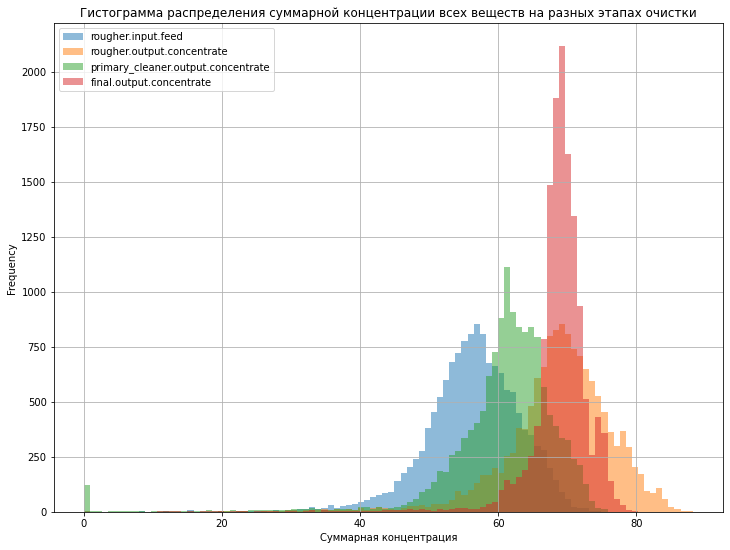

In [37]:
# посмотрим на график после удаления аномалий
data_train[process].plot(
            kind='hist',    
            title = 'Гистограмма распределения суммарной концентрации всех веществ на разных этапах очистки',
            bins=100, 
            grid=True, 
            legend=True,
            figsize=(12, 9),
            alpha=0.5,
            ).set(xlabel='Суммарная концентрация')
plt.show()

In [38]:
# перепроверим суммарные значения после первичной очистки
display(data_train[data_train['primary_cleaner.output.concentrate'] == 0])

data_train[(data_train['primary_cleaner.output.concentrate'] > 0) & \
           (data_train['primary_cleaner.output.concentrate'] < 1)]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
6780,2017-04-12 01:59:59,5.618554,11.383301,10.326735,42.771797,71.443382,9.510587,3.328210,10.778850,2.578797,...,26.027427,-456.451653,24.023158,-450.419749,30.010689,-500.383977,57.622237,66.551581,0.774000,70.100386
8642,2017-07-13 04:59:59,7.284284,12.322915,11.833125,38.462170,65.713143,6.861605,2.358111,10.336621,2.478794,...,17.981082,-499.436552,13.016561,-499.977942,15.007095,-499.994771,51.883150,71.901628,0.113023,69.902495
10450,2018-02-17 17:59:59,6.726756,9.316409,9.656618,43.539538,84.044557,9.494177,0.742386,14.232371,1.624926,...,11.009237,-501.751430,8.966800,-507.938057,10.998100,-499.011339,60.587233,70.244588,0.040000,69.239321
10451,2018-02-17 18:59:59,6.001206,9.337261,8.644094,44.816864,81.020302,9.825662,0.945466,13.833944,1.833889,...,11.062995,-499.777865,9.019308,-500.327652,11.007770,-499.864785,60.932924,71.587910,0.040000,68.799424
10452,2018-02-17 19:59:59,5.487604,8.993153,8.867548,46.270458,77.929146,9.898577,1.070071,13.749108,2.019746,...,11.032102,-499.351357,8.932197,-499.863106,10.989062,-498.663977,59.948689,72.355166,0.040000,69.618763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13963,2018-08-10 03:59:59,4.442023,9.238301,8.544080,46.335757,70.786883,15.481737,4.182762,10.009065,3.699811,...,22.953779,-498.555444,17.997955,-500.101945,23.010025,-517.763087,65.372679,74.231258,0.040000,68.560160
13964,2018-08-10 04:59:59,4.916341,9.644849,8.945859,44.961086,67.943045,16.154268,4.374716,10.503920,4.018436,...,23.018333,-499.900014,17.966376,-500.193360,23.000951,-511.958802,65.082625,75.579562,0.040000,68.468135
13965,2018-08-10 05:59:59,5.134035,9.683889,9.203260,44.519141,72.002510,15.955848,4.365837,10.190798,3.492422,...,22.885700,-499.773159,17.931386,-500.026603,23.009269,-521.406956,64.927849,74.882662,0.040000,68.540325
13966,2018-08-10 06:59:59,4.503756,8.387537,7.408152,35.313266,81.349671,9.262237,2.541834,5.580436,1.704367,...,19.961717,-484.411358,14.988112,-498.198420,22.974569,-504.838074,45.851614,43.117470,0.040000,55.612711


Выводы:
1. Максимальная суммарная концентрация всех веществ в финальном концентрате, минимальная - в исходном сырье.
2. Были обнаружены нулевые значения на трех этапах - удалили аномалии.
3. После первичной очистки есть 120 строк с суммарной концентрацией выше 0 и меньше 1, удалять их не будем, так как возможно это реальные данные в ходе технологического процесса.

## Модель

### Подготовка данных к обучению моделей

Перед обучением моделей подготовим данные, удалив ненужные признаки.
Сначала удалим столбец 'date' из тестовой выборки - он не несет никакой полезной для обучения модели информации.

In [39]:
data_test = data_test.drop('date', axis=1)

Создадим новую обучающую выборку со столбцами, которые есть в тестовой, удалив из обучающей выборки лишние столбцы. Так как обученная модель будет применяться до завершения технологического процесса, то такие признаки ей будут недоступны, следовательно учить на них модель не имеет смысла.

Для этого еще раз сформируем список столбцов, которых нет в тестовой выборке, но есть в обучающей.

In [40]:
features_no_test = set(data_train.columns.to_list()) - set(data_test.columns.to_list())
features_no_test

{'date',
 'final.output.concentrate',
 'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.input.feed',
 'rougher.output.concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_so

In [41]:
short_data_train = data_train.drop(features_no_test, axis=1)

In [42]:
# проверим размерность новой выборки
short_data_train.shape

(13725, 54)

Теперь создадим переменные для признаков ("фичи") и целевых признаков (в данном проекте их 2) из наших выборок. 

Целевые признаки - эффективность обогащения золота в концентрате после флотации и в финальном концентрате - столбцы "rougher.output.recovery" и "final.output.recovery". Создадим нужные нам переменные.

Перемешаем обучающую выборку, так как наш датасет упорядочен.

In [43]:
short_data_train  = shuffle(short_data_train, random_state=12345)

In [44]:
targets = ['rougher.output.recovery', 'final.output.recovery']

In [45]:
features_train = short_data_train.drop(targets, axis=1)
target_train_rougher = short_data_train['rougher.output.recovery']
target_train_final = short_data_train['final.output.recovery']

features_test = data_test.drop(targets, axis=1)
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

In [46]:
print(features_train.shape)
print(target_train_rougher.shape)
print(target_train_final.shape)
print(features_test.shape)
print(target_test_rougher.shape)
print(target_test_final.shape)

(13725, 52)
(13725,)
(13725,)
(5290, 52)
(5290,)
(5290,)


Данные готовы к обучению моделей:
- обучающая и тестовые выборки содержат одинаковые столбцы
- созданы переменные для признаков и таргета в обучающей и тестовой выборках

### Функция для вычисления итогового sMAPE

Создадим 2 функции для вычисления симметричного среднего абсолютного процентного отклонения: обычную и итоговую (сумма двух sMAPE).

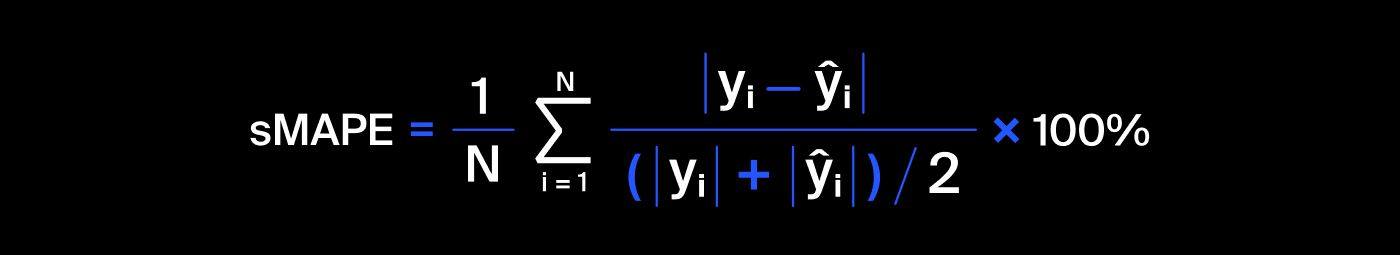

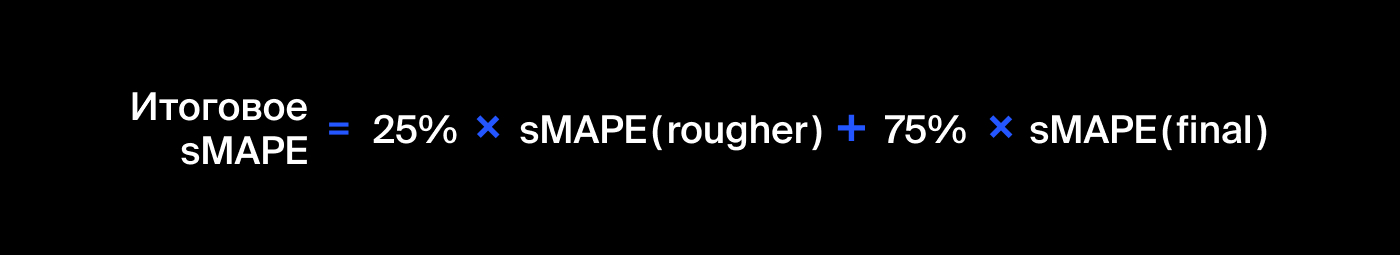

In [47]:
def smape(y_true, y_pred, **kwargs):
    top = np.abs(y_true - y_pred)
    bottom = (np.abs(y_true) + np.abs(y_pred)) / 2
    error = (1 / len(y_true)) * np.sum(top / bottom) * 100
    return error

In [48]:
def total_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

### Обучение моделей

Создадим собственный scorer, чтобы использовать его при кросс-валидации.

In [49]:
# greater_is_better=False - так как у нас задача минимизации
my_scorer = make_scorer(smape, greater_is_better=False)

Обучим модели Дерево решений, Случайный лес и Линейная регрессия и проверим, у какой модели лучшее значение sMAPE.

In [50]:
# Дерево решений с макс.глубиной 15
param_grid = {'max_depth': range(1, 16)}

model_1 = DecisionTreeRegressor(random_state=12345)
model_2 = DecisionTreeRegressor(random_state=12345)

grid_search_1 = GridSearchCV(model_1, param_grid, cv=5, scoring=my_scorer)
grid_search_2 = GridSearchCV(model_2, param_grid, cv=5, scoring=my_scorer)

grid_search_1.fit(features_train, target_train_rougher)
rougher_smape = -grid_search_1.best_score_
grid_search_2.fit(features_train, target_train_final)
final_smape = -grid_search_2.best_score_

total_smape_tree = total_smape(rougher_smape, final_smape)

print(f'sMAPE лучшей модели после флотации: {rougher_smape}') 
print(f'Лучшие гиперпараметры: {grid_search_1.best_params_}')
print()
print(f'sMAPE лучшей модели в финальном концентрате: {final_smape}') 
print(f'Лучшие гиперпараметры: {grid_search_2.best_params_}')
print()
print('Итоговый sMAPE:', total_smape_tree)

sMAPE лучшей модели после флотации: 3.483225120572083
Лучшие гиперпараметры: {'max_depth': 14}

sMAPE лучшей модели в финальном концентрате: 7.498578872038308
Лучшие гиперпараметры: {'max_depth': 11}

Итоговый sMAPE: 6.494740434171752


In [51]:
# Случайный лес
param_grid = {'max_depth': range(1, 7), 
             'n_estimators': range(1, 32, 10)}

model_1 = RandomForestRegressor(random_state=12345)
model_2 = RandomForestRegressor(random_state=12345)

grid_search_1 = GridSearchCV(model_1, param_grid, cv=5, scoring=my_scorer, n_jobs= -1)
grid_search_2 = GridSearchCV(model_2, param_grid, cv=5, scoring=my_scorer, n_jobs= -1)

grid_search_1.fit(features_train, target_train_rougher)
rougher_smape = -grid_search_1.best_score_
grid_search_2.fit(features_train, target_train_final)
final_smape = -grid_search_2.best_score_

total_smape_forest = total_smape(rougher_smape, final_smape)

print(f'sMAPE лучшей модели после флотации: {rougher_smape}') 
print(f'Лучшие гиперпараметры: {grid_search_1.best_params_}')
print()
print(f'sMAPE лучшей модели в финальном концентрате: {final_smape}') 
print(f'Лучшие гиперпараметры: {grid_search_2.best_params_}')
print()
print('Итоговый sMAPE:', total_smape_forest)

sMAPE лучшей модели после флотации: 3.930695968173905
Лучшие гиперпараметры: {'max_depth': 6, 'n_estimators': 31}

sMAPE лучшей модели в финальном концентрате: 7.290580844592071
Лучшие гиперпараметры: {'max_depth': 6, 'n_estimators': 31}

Итоговый sMAPE: 6.450609625487529


In [52]:
# Линейная регрессия
model_1 = LinearRegression()
model_2 = LinearRegression()
rougher_smape = -cross_val_score(model_1, features_train, target_train_rougher, \
                                cv=5, scoring=my_scorer).mean()
final_smape = -cross_val_score(model_2, features_train, target_train_final, \
                                cv=5, scoring=my_scorer).mean()
total_smape_reg = total_smape(rougher_smape, final_smape)

print("sMAPE после флотации:", rougher_smape)
print("sMAPE в финальном концентрате:", final_smape)
print('Итоговый sMAPE:', total_smape_reg)

sMAPE после флотации: 4.658541462538667
sMAPE в финальном концентрате: 8.073969334106515
Итоговый sMAPE: 7.220112366214553


Проверим влияние масштаба признаков на качество модели.

In [53]:
pipeline_1 = make_pipeline(StandardScaler(), LinearRegression())
pipeline_2 = make_pipeline(StandardScaler(), LinearRegression())

rougher_smape = -cross_val_score(pipeline_1, features_train, target_train_rougher, \
                                cv=5, scoring=my_scorer).mean()
final_smape = -cross_val_score(pipeline_2, features_train, target_train_final, \
                                cv=5, scoring=my_scorer).mean()
total_smape_reg_scal = total_smape(rougher_smape, final_smape)

print("sMAPE после флотации:", rougher_smape)
print("sMAPE в финальном концентрате:", final_smape)
print('Итоговый sMAPE:', total_smape_reg_scal)

sMAPE после флотации: 4.658541462538663
sMAPE в финальном концентрате: 8.073969334106508
Итоговый sMAPE: 7.220112366214547


Масштаб признаков не влияет на обучение модели.

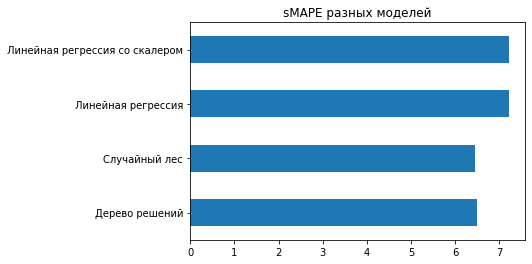

In [54]:
# выведем графически полученные результаты sMAPE
total = pd.Series({'Дерево решений': total_smape_tree, 'Случайный лес': total_smape_forest, \
                    'Линейная регрессия': total_smape_reg, \
                   'Линейная регрессия со скалером': total_smape_reg_scal})
total.plot(kind='barh', title='sMAPE разных моделей');

Выяснили, что лучшей моделью оказался Случайный лес с глубиной 6 (max_depth=6) и количеством деревьев 31 (n_estimators=31). Проверим ее качество на тестовой выборке.

### Проверка модели на тестовой выборке

In [55]:
model_1 = RandomForestRegressor(random_state=12345, max_depth=6, n_estimators=31)
model_2 = RandomForestRegressor(random_state=12345, max_depth=6, n_estimators=31)

model_1.fit(features_train, target_train_rougher)
model_2.fit(features_train, target_train_final)

predicted_valid_1 = model_1.predict(features_test)
predicted_valid_2 = model_2.predict(features_test)

rougher_smape = smape(target_test_rougher, predicted_valid_1)
final_smape = smape(target_test_final, predicted_valid_2)

print("sMAPE после флотации:", rougher_smape)
print("sMAPE в финальном концентрате:", final_smape)
print('Итоговый sMAPE:', total_smape(rougher_smape, final_smape))

sMAPE после флотации: 8.246067389086193
sMAPE в финальном концентрате: 9.747280410656337
Итоговый sMAPE: 9.371977155263801


На тестовой выборке получили итоговый sMAPE: 9.371977155263801.

### Проверка модели на адекватность

In [56]:
model_1 = DummyRegressor(strategy="mean")
model_2 = DummyRegressor(strategy="mean")

model_1.fit(features_train, target_train_rougher)
model_2.fit(features_train, target_train_final)

predicted_valid_1 = model_1.predict(features_test)
predicted_valid_2 = model_2.predict(features_test)

rougher_smape = smape(target_test_rougher, predicted_valid_1)
final_smape = smape(target_test_final, predicted_valid_2)

print("sMAPE после флотации:", rougher_smape)
print("sMAPE в финальном концентрате:", final_smape)
print('Итоговый sMAPE:', total_smape(rougher_smape, final_smape))

sMAPE после флотации: 9.064360592154268
sMAPE в финальном концентрате: 10.086634972028314
Итоговый sMAPE: 9.831066377059802


Выбранная наилучшей моделью Случайный лес действительно оказалась рабочей, так как качество sMAPE у нее лучше, чем у DummyRegressor. Модель прошла проверку на адекватность.

## Выводы

В ходе проекта было сделано:
1. Изучены данные и сделана предобработка данных: заполнены пропуски, изменен тип данных, подготовлены выборки для дальнейшей работы.
2. Проверен расчет эффективности обогащения чернового концентрата.
3. Проанализирована концентрация металлов на разных этапах очистки.
4. Изучено распределение размеров гранул сырья.
5. Проанализирована суммарная концентрация всех веществ на разных этапах, найдены и удалены аномальные значения.
6. Написаны функции для подсчета sMAPE и итогового sMAPE.
7. Обучены 3 модели с гиперпараметрами и в каждой модели посчитаны sMAPE.
8. Выбрана лучшая модель - Случайный лес - и проведена проверка модели на тестовой выборке.
9. Модель Случайный лес прошла проверку на адекватность.